# Enunciado

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

## Preparación de datos (1.0pt)

Explore el archivo `covid19_confirmados.csv` y utilice la función `pd.read_csv` para importarlo como un `DataFrame` considerando las siguientes indicaciones:

1. Utilice el nombre de país como índice.
1. Elimine las columnas `Lat` y `Long`.
1. Use TimeStamps para las columnas asociadas a fechas.
1. Reduzca la columna `Province/State`. El DataFrame resultante debe tener los totales a nivel país.

In [2]:
data = pd.read_csv('data/covid19_confirmados.csv',
                   index_col='Country/Region',
                   infer_datetime_format=True,
                 )
#data.set_index(['Country/Region'],inplace=True).drop(['Lat','Long'])
data.drop(['Lat','Long'],axis=1,inplace=True)
data_confirmados = data.groupby('Country/Region',sort=False).sum()

C:\Users\casan\AppData\Local\Temp\ipykernel_16168\2446061222.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_confirmados = data.groupby('Country/Region',sort=False).sum()


Explore el archivo `population_by_country_2020.csv` y utilice la función `pd.read_csv` de pandas para importarlo como un `DataFrame`. Utilice el nombre de país como índice principal. 

Nota: Algunos siglas o nombres podrían no calzar con el `DataFrame` anterior, explore y corrija programaticamente dichos errores.

In [3]:
d_popu = pd.read_csv('data/poblacion_mundial2020.csv',
                   index_col='Country (or dependency)'
                 )
#data_popu.rename(columns={'Country (or dependency)':'Country/Region'},inplace=True)
data_popu = d_popu.rename_axis('Country/Region')

Realice un `merge` de los `DataFrame` anteriores. El objetivo es asignar un valor de `Population` a cada elemento del primer `DataFrame`. Indique las filas donde no se puede realizar el `merge` y luego descártelas de su `DataFrame` final.

In [4]:
data_conf_popu = data_confirmados.merge(data_popu, how='inner', left_index=True, right_index=True)
data_conf_popu.drop(['Yearly Change', 'Net Change',
       'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'],
        axis=1,
        inplace=True)

Repita el procedimiento para los archivos `covid19_recuperados.csv` y `covid19_muertes.csv`.

In [5]:
# Importar datas
data_muerte = pd.read_csv('data/covid19_muertes.csv',
                   index_col='Country/Region',
                   infer_datetime_format=True,
                 )
data_muerte.drop(['Lat','Long'],axis=1,inplace=True)
data_muertes = data_muerte.groupby('Country/Region',sort=False).sum()

data_recu = pd.read_csv('data/covid19_recuperados.csv',
                   index_col='Country/Region',
                   infer_datetime_format=True,
                 )
data_recu.drop(['Lat','Long'],axis=1,inplace=True)
data_recuperados = data_recu.groupby('Country/Region',sort=False).sum()

# Merge muertes-poblacion
data_mrt_popu = data_muertes.merge(data_popu, how='inner', left_index=True, right_index=True)
data_mrt_popu.drop(['Yearly Change', 'Net Change',
       'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'],
        axis=1,
        inplace=True)

# Merge recuperados-poblacion
data_recu_popu = data_recuperados.merge(data_popu, how='inner', left_index=True, right_index=True)
data_recu_popu.drop(['Yearly Change', 'Net Change',
       'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'],
        axis=1,
        inplace=True)

C:\Users\casan\AppData\Local\Temp\ipykernel_16168\3036467335.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_muertes = data_muerte.groupby('Country/Region',sort=False).sum()
C:\Users\casan\AppData\Local\Temp\ipykernel_16168\3036467335.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_recuperados = data_recu.groupby('Country/Region',sort=False).sum()


## Análisis global (1.5pt)

Escriba una función que reciba una fecha y que retorne las siguientes series: 

1. Tasa de incidencia: Casos confirmados por 100.000 dividido población total.
1. Tasa de recuperación: Casos recuperados por 100.000 dividido población total.
1. Tasa de mortalidad: Casos decesos por 100.000 dividido población total.

Ahora, considerando los siguientes dos puntos temporales:

- 22 de Enero de 2021.
- 22 de Enero de 2022.

Muestre los nombres y los valores de los 3 países con:

1. La mayor y menor tasa de incidencia, respectivamente.
1. La mayor y menor tasa de recuperación, respectivamente.
1. La mayor y menor tasa de mortalidad, respectivamente.

Muestre también la posición de Chile en el ranking.

In [6]:
# Tasa de incidencia confirmados:
def Tasas(f):
    c = (data_conf_popu[f]*100000)/data_conf_popu['Population (2020)']
    r = (data_recu_popu[f]*100000)/data_conf_popu['Population (2020)']
    m = (data_mrt_popu[f]*100000)/data_conf_popu['Population (2020)']
    
    return c,r,m

In [7]:
# Análisis del 1/22/21:
t_incidencia_1_22_21,t_recuperados_1_22_21,t_muerte_1_22_21 = Tasas('1/22/21')
t_incidencia_1_22_21_sorted = t_incidencia_1_22_21.sort_values(ascending=False)
t_recuperados_1_22_21_sorted = t_recuperados_1_22_21.sort_values(ascending=False)
t_muerte_1_22_21_sorted = t_muerte_1_22_21.sort_values(ascending=False)

print('La mayor tasa de incidencia es de: ',t_incidencia_1_22_21.idxmax(),'con ', t_incidencia_1_22_21.max())
print('La menor tasa de incidencia es de: ',t_incidencia_1_22_21.idxmin(),'con ', t_incidencia_1_22_21.min())

print('La mayor tasa de recuperados es de: ',t_recuperados_1_22_21.idxmax(),'con ', t_recuperados_1_22_21.max())
print('La menor tasa de recuperados es de: ',t_recuperados_1_22_21.idxmin(),'con ', t_recuperados_1_22_21.min())

print('La mayor tasa de muerte es de: ',t_muerte_1_22_21.idxmax(),'con ', t_muerte_1_22_21.max())
print('La menor tasa de muerte es de: ',t_muerte_1_22_21.idxmin(),'con ', t_muerte_1_22_21.min())

La mayor tasa de incidencia es de:  Andorra con  12183.16146311799
La menor tasa de incidencia es de:  Kiribati con  0.0
La mayor tasa de recuperados es de:  Andorra con  11045.8421209259
La menor tasa de recuperados es de:  Belgium con  0.0
La mayor tasa de muerte es de:  Peru con  299.4413560627495
La menor tasa de muerte es de:  Cambodia con  0.0


In [ ]:
# Encontrar posicion de Chile para enero de 2021
for p in range(t_incidencia_1_22_21_sorted.size):
    if t_incidencia_1_22_21_sorted.index[p] == 'Chile':
        print('Chile se encuentra en la posición',p+1,'de las tasas de incidencia más altas para enero de 2021')
    if t_recuperados_1_22_21_sorted.index[p] == 'Chile':
        print('Chile se encuentra en la posición',p+1,'de las tasas de recuperados más altas para enero de 2021')
    if t_muerte_1_22_21_sorted.index[p] == 'Chile':
        print('Chile se encuentra en la posición',p+1,'de las tasas de muerte más altas para enero de 2021')

In [8]:
# Análisis del 1/22/22:
t_incidencia_1_22_22,t_recuperados_1_22_22,t_muerte_1_22_22 = Tasas('1/22/22')
t_incidencia_1_22_22_sorted = t_incidencia_1_22_22.sort_values(ascending=False)
t_recuperados_1_22_22_sorted = t_recuperados_1_22_22.sort_values(ascending=False)
t_muerte_1_22_22_sorted = t_muerte_1_22_22.sort_values(ascending=False)

print('La mayor tasa de incidencia es de: ',t_incidencia_1_22_22.idxmax(),'con ', t_incidencia_1_22_22.max())
print('La menor tasa de incidencia es de: ',t_incidencia_1_22_22.idxmin(),'con ', t_incidencia_1_22_22.min())

print('La mayor tasa de recuperados es de: ',t_recuperados_1_22_22.idxmax(),'con ', t_recuperados_1_22_22.max())
print('La menor tasa de recuperados es de: ',t_recuperados_1_22_22.idxmin(),'con ', t_recuperados_1_22_22.min())

print('La mayor tasa de muerte es de: ',t_muerte_1_22_22.idxmax(),'con ', t_muerte_1_22_22.max())
print('La menor tasa de muerte es de: ',t_muerte_1_22_22.idxmin(),'con ', t_muerte_1_22_22.min())

La mayor tasa de incidencia es de:  Andorra con  42730.34274845705
La menor tasa de incidencia es de:  Micronesia con  0.8678220270586908
La mayor tasa de recuperados es de:  Afghanistan con  0.0
La menor tasa de recuperados es de:  Afghanistan con  0.0
La mayor tasa de muerte es de:  Peru con  617.6692790251777
La menor tasa de muerte es de:  Holy See con  0.0


In [ ]:
# Encontrar posicion de Chile para enero de 2022
for p in range(t_incidencia_1_22_22_sorted.size):
    if t_incidencia_1_22_22_sorted.index[p] == 'Chile':
        print('Chile se encuentra en la posición',p+1,'de las tasas de incidencia más altas para enero de 2022')
    if t_recuperados_1_22_22_sorted.index[p] == 'Chile':
        print('Chile se encuentra en la posición',p+1,'de las tasas de recuperados más altas para enero de 2022')
    if t_muerte_1_22_22_sorted.index[p] == 'Chile':
        print('Chile se encuentra en la posición',p+1,'de las tasas de muerte más altas para enero de 2022')

Ahora realice las siguientes gráficas de nube de punto

- Tasa de incidencia Enero 2021 versus Tasa de incidencia Enero 2022.
- Tasa de mortalidad Enero 2021 versus Tasa de incidencia Enero 2022.

En cada una:

- Utilice color para demarcar el [continente](https://www.kaggle.com/datasets/statchaitya/country-to-continent) de cada país.
- Realice una anotación con el código del pais cercano a su punto: https://country-code.cl/es/.
- Utilice un tamaño relativamente más grande para Chile.
- Considere las buenas prácticas vistas en clases.

In [9]:
continentes = pd.read_csv('countryContinent.csv', usecols=['country','continent','code_2'], index_col='country')
tablas = continentes.rename_axis('Country/Region')
tablas['incidencia 2021'] = t_incidencia_1_22_21
tablas['incidencia 2022'] = t_incidencia_1_22_22
tablas['mortalidad 2021'] = t_muerte_1_22_21
tablas.dropna();

In [10]:
table_reset_index = tablas.reset_index( level= 0,drop=False,inplace=False)
table_reset_index.dropna(inplace=True);
table_reset_index.set_index(['continent','Country/Region'],inplace=True)
table_reset_index

,,code_2,incidencia 2021,incidencia 2022,mortalidad 2021
continent,Country/Region,,,,
Asia,Afghanistan,AF,139.434431,408.319744,6.065371
Europe,Albania,AL,2455.652798,8564.182537,45.286471
Africa,Algeria,DZ,239.002001,533.223367,6.493186
Europe,Andorra,AD,12183.161463,42730.342748,120.330715
Africa,Angola,AO,58.334210,290.329929,1.368367
...,...,...,...,...,...
Asia,Uzbekistan,UZ,233.286870,632.719700,1.847888
Oceania,Vanuatu,VU,0.324320,2.270243,0.000000
Asia,Yemen,YE,7.075219,35.359394,2.051079


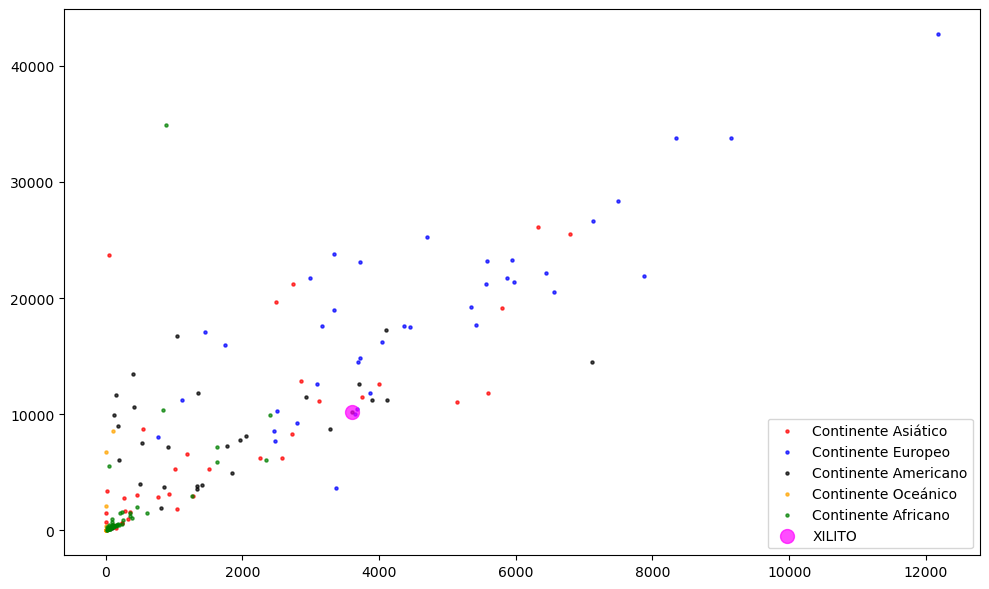

In [39]:
idx = pd.IndexSlice
table_reset_index.loc[idx['Asia',:],'incidencia 2021']

fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)

ax.scatter(x=table_reset_index.loc[idx['Asia',:],'incidencia 2021'],
           y=table_reset_index.loc[idx['Asia',:],'incidencia 2022'],s=5,c='r',alpha=0.7,label='Continente Asiático')

ax.scatter(x=table_reset_index.loc[idx['Europe',:],'incidencia 2021'],
           y=table_reset_index.loc[idx['Europe',:],'incidencia 2022'],s=5,c='b',alpha=0.7,label='Continente Europeo')

ax.scatter(x=table_reset_index.loc[idx['Americas',:],'incidencia 2021'],
           y=table_reset_index.loc[idx['Americas',:],'incidencia 2022'],s=5,c='k',alpha=0.7,label='Continente Americano')

ax.scatter(x=table_reset_index.loc[idx['Oceania',:],'incidencia 2021'],
           y=table_reset_index.loc[idx['Oceania',:],'incidencia 2022'],s=5,c='orange',alpha=0.7,label='Continente Oceánico')

ax.scatter(x=table_reset_index.loc[idx['Africa',:],'incidencia 2021'],
           y=table_reset_index.loc[idx['Africa',:],'incidencia 2022'],s=5,c='g',alpha=0.7,label='Continente Africano')

ax.scatter(x=table_reset_index.loc[idx[:,'Chile'],'incidencia 2021'],
           y=table_reset_index.loc[idx[:,'Chile'],'incidencia 2022'],s=100,c='magenta',alpha=0.7,label='XILITO')

ax.legend();

En base a los rankings y gráficas de nube de punto analice y discuta sobre el caso de Chile considerando las siguientes preguntas guía:

- ¿A qué países del mundo se parece más?
- ¿A qué países de América Latina se parece más?
- ¿A qué países de la [OCDE](https://es.wikipedia.org/wiki/Organizaci%C3%B3n_para_la_Cooperaci%C3%B3n_y_el_Desarrollo_Econ%C3%B3micos) se parece más? 


## Análisis comparativo (1.5pt)

Construya una interfaz gráfica usando `ipywidgets` y `matplotlib` que permita realizar comparaciones entre las series de tiempo de COVID-19 de dos países seleccionados arbitrariamente. A modo de simplificación considere sólo los países de la [OCDE](https://es.wikipedia.org/wiki/Organizaci%C3%B3n_para_la_Cooperaci%C3%B3n_y_el_Desarrollo_Econ%C3%B3micos). 

Requerimientos:

1. La interfaz debe incluir controles para escoger dos países a partir de una lista.
1. La interfaz debe incluir tres [tabs](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#Tabs), el primero debe mostrar las series de tiempo de ambos países de los casos confirmados, el segundo la de recuperados y el tercero la de los decesos, respectivamente. Use una leyenda para indicar el nombre de los países.
1. La interfaz debe tener un control que permita escoger entre casos acumulados y casos nuevos. Hint: Para los casos nuevos pueden revisar la función [`diff`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.diff.html).
1. La interfaz debe tener un control que permita escoger entre valores absolutos y valores relativos (tasas por 100.000 habitantes).
1. La interfaz debe tener un control que permita escoger entre valores diarios y valores semanales. Para esto último se recomienda usar `groupby` con una [frecuencia lunes a lunes](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets).
    



## Dashboard interactivo (1.0pt)

Implemente un *dashboard web* interactivo a partir de la interfaz desarrollada en el punto anterior utilizando la librería [voila](https://github.com/voila-dashboards/voila). Sirva su interfaz en la nube, para esto puede considerar los servicios gratuitos [binder](https://mybinder.org/) o [heroku](https://www.heroku.com/free). Revise la documentación de voila [con respecto a *deployment* en la nube](https://voila.readthedocs.io/en/stable/deploy.html) y este repositorio con [un ejemplo en base a heroku](https://github.com/voila-dashboards/voila-heroku). 

Escriba el link de su dashboard web a continuación:

## Discusión final (1.0pt)

En base a su interfaz:   

1. Describa en detalle la situación de Chile con respecto a la evolución temporal de las series de tiempo. Destaque patrones y comportamientos que considere relevantes. Compare lo que observa en las distintas series de tiempo. 
1. Considerando la evolución a nivel de semana, conteste ¿En qué fechas ocurre un aumento o disminución notoria de los casos? ¿En qué fechas hay máximos y mínimos?
1. Considerando métricas que sean relativas compare el caso de Chile contra cinco países de la OCDE seleccionados por ustedes. Destaque semejanzas y diferencias considerando las cantidades y los posibles desfases temporales existentes.